# S p a C y  1 0 1

```
All features described in SpaCy 101 Course with the News DataSet
```

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import spacy

print(f'spacy = {spacy.__version__}')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/repository/ZNClub-PA-ML-AI-Sentiment-analysis-using-Business-News-82d860a/data"))

# Any results you write to the current directory are saved as output.

spacy = 2.1.4
['processed', 'scrapy', 'quandl', 'explicit', 'README.md', 'json']


In [2]:
df = pd.read_csv("\
../input/repository/ZNClub-PA-ML-AI-Sentiment-analysis-using-Business-News-82d860a/data/processed/normalized.csv")

#limit df
df = df[:5]
row_index = 1
df.head()

,date,body,id,intro,time,title
0,2016-11-09,New Delhi: State-run Rural Electrification Cor...,00wS6lZEcgYyCPt6mIXwrJ,"The company had posted a net profit of Rs1,61...",22:38,"REC net profit up 8% at Rs1,751 crore in July-..."
1,2017-01-24,"Two sets of findings, related to societal trus...",0229PSUGl9BxwsW7urHATP,The resulting trust deficit has had several di...,12:47,The consequences of declining trust in CEOs
2,2016-11-15,Mumbai: The ministry of corporate affairs (MCA...,02A1DgXR3wUC7xEX4UzqHN,Rejecting reasons cited for not spending on CS...,02:13,MCA pulls up companies over lack of CSR spends
3,2016-11-10,New Delhi: The central governments decision t...,02xKYa7PKoROOpbx5xbxhM,"E-wallet companies like Paytm, Freecharge are ...",01:21,Demonetization to give major push to e-wallets...
4,2016-12-21,"Pune: The 57-year-old boss of Tech Mahindra, C...",05PcYpZOmBeSeBLoMPqETN,Tech Mahindra CEO CP Gurnani on bets his firm ...,03:19,"By 2020, 50% of Tech Mahindras business will ..."


In [3]:
%%time

clean_body = lambda x: re.sub("[\n\t\r]", "", x) if isinstance(x, str) else ""

df['body'] = df['body'].apply(clean_body)



CPU times: user 84 ms, sys: 0 ns, total: 84 ms
Wall time: 80.1 ms


## Language Model

In [4]:
from spacy.lang.en import English
nlp = English()
df['Doc'] = df['body'].apply(nlp)

### NLP Model creates Document object

In [5]:
row_index = 1
doc = df['Doc'][row_index]
doc

Two sets of findings, related to societal trust levels, in a report released last week at the World Economic Forums annual meeting in Davos, should be a cause of grave concern to all of us. Part of a study released by communications group Edelman, the survey of more than 33,000 people in 28 countries including India, recorded the largest-ever drop of trust in business, government, the media, and non-government organisations (NGOs).   Corporate chief executive officers (CEOs), whose credibility level dropped in each of the countries surveyed, were aggressively targeted with only 37% of people saying they trusted them.The 12-point drop from the previous year is the all-time low since the survey began in 2001. This isnt the first time the corporate sector has been reminded of declining peoples trust. Last January, Young & Rubicam BrandAsset Valuator revealed that consumers trust in well-known brands continues to fall.ALSO READ | What global CEOs are watching for, according to a PwC su

### Document creates Span object

In [6]:
span = doc[0:8]
span

Two sets of findings, related to societal

### Lexical Analysis

In [7]:
print('Index:   ', [token.i for token in span])
print('Text:    ', [token.text for token in span])

print('is_alpha:', [token.is_alpha for token in span])
print('is_punct:', [token.is_punct for token in span])
print('like_num:', [token.like_num for token in span])

Index:    [0, 1, 2, 3, 4, 5, 6, 7]
Text:     ['Two', 'sets', 'of', 'findings', ',', 'related', 'to', 'societal']
is_alpha: [True, True, True, True, False, True, True, True]
is_punct: [False, False, False, False, True, False, False, False]
like_num: [True, False, False, False, False, False, False, False]


## Statistical models

In [8]:
%%time

nlp = spacy.load('en_core_web_sm')
df['StatsDoc'] = df['body'].apply(nlp)

CPU times: user 744 ms, sys: 112 ms, total: 856 ms
Wall time: 908 ms


In [9]:
doc = df['StatsDoc'][row_index]
doc

Two sets of findings, related to societal trust levels, in a report released last week at the World Economic Forums annual meeting in Davos, should be a cause of grave concern to all of us. Part of a study released by communications group Edelman, the survey of more than 33,000 people in 28 countries including India, recorded the largest-ever drop of trust in business, government, the media, and non-government organisations (NGOs).   Corporate chief executive officers (CEOs), whose credibility level dropped in each of the countries surveyed, were aggressively targeted with only 37% of people saying they trusted them.The 12-point drop from the previous year is the all-time low since the survey began in 2001. This isnt the first time the corporate sector has been reminded of declining peoples trust. Last January, Young & Rubicam BrandAsset Valuator revealed that consumers trust in well-known brands continues to fall.ALSO READ | What global CEOs are watching for, according to a PwC su

### POS: Parts of Speech

In [10]:
pos_df = pd.DataFrame()

for i, token in enumerate(doc):
    pos_df.loc[i, 'text'] = token.text
    pos_df.loc[i, 'lemma'] = token.lemma_,
    pos_df.loc[i, 'pos'] = spacy.explain(token.pos_)
    pos_df.loc[i, 'tag'] = token.tag_
    pos_df.loc[i, 'dep'] = token.dep_
    pos_df.loc[i, 'shape'] = token.shape_
    pos_df.loc[i, 'is_alpha'] = token.is_alpha
    pos_df.loc[i, 'is_stop'] = token.is_stop
    pos_df.loc[i, 'is_punctuation'] = token.is_punct
    
pos_df.head(20)

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punctuation
0,Two,two,numeral,CD,nummod,Xxx,True,True,False
1,sets,"(set,)",noun,NNS,nsubj,xxxx,True,False,False
2,of,"(of,)",adposition,IN,prep,xx,True,True,False
3,findings,"(finding,)",noun,NNS,pobj,xxxx,True,False,False
4,",","(,,)",punctuation,",",punct,",",False,False,True
5,related,"(relate,)",verb,VBN,acl,xxxx,True,False,False
6,to,"(to,)",adposition,IN,prep,xx,True,True,False
7,societal,"(societal,)",adjective,JJ,amod,xxxx,True,False,False
8,trust,"(trust,)",noun,NN,compound,xxxx,True,False,False
9,levels,"(level,)",noun,NNS,pobj,xxxx,True,False,False


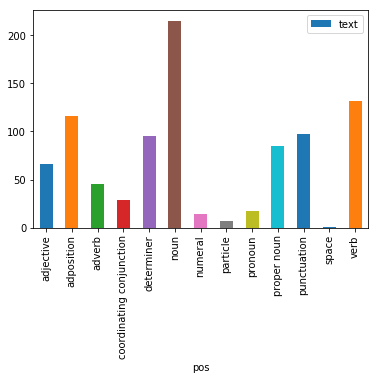

In [11]:
pos = pos_df.groupby('pos')['text'].count().reset_index()

pos.plot(x='pos' , y='text', kind='bar' )

### NER: Named Entity Recognition

In [12]:
ent_df = pd.DataFrame()

for i, token in enumerate(doc.ents):
    ent_df.loc[i, 'entity'] = token.text
    ent_df.loc[i, 'label'] = token.label_
    ent_df.loc[i, 'recognition'] = spacy.explain(token.label_)
ent_df.head(20)

,entity,label,recognition
0,Two,CARDINAL,Numerals that do not fall under another type
1,last week,DATE,Absolute or relative dates or periods
2,annual,DATE,Absolute or relative dates or periods
3,Davos,GPE,"Countries, cities, states"
4,Edelman,ORG,"Companies, agencies, institutions, etc."
5,"more than 33,000",CARDINAL,Numerals that do not fall under another type
6,28,CARDINAL,Numerals that do not fall under another type
7,India,GPE,"Countries, cities, states"
8,only 37%,PERCENT,"Percentage, including ""%"""
9,the previous year,DATE,Absolute or relative dates or periods


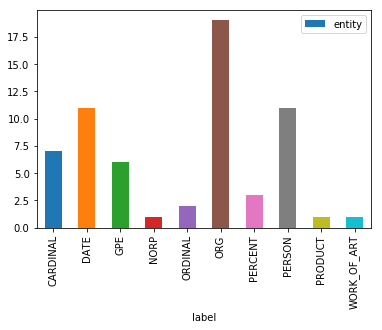

In [13]:
ent = ent_df.groupby('label')['entity'].count().reset_index()

ent.plot(x='label' , y='entity', kind='bar' )

In [14]:
spacy.displacy.render(doc, style='ent',jupyter=True)

### Token Dependency

In [15]:
dep_df = pd.DataFrame()

for i, token in enumerate(doc):
    dep_df.loc[i, 'token'] = token.text
    dep_df.loc[i, 'label'] = token.dep_
    dep_df.loc[i, 'dependency'] = spacy.explain(token.dep_)
dep_df.head(20)

,token,label,dependency
0,Two,nummod,numeric modifier
1,sets,nsubj,nominal subject
2,of,prep,prepositional modifier
3,findings,pobj,object of preposition
4,",",punct,punctuation
5,related,acl,clausal modifier of noun (adjectival clause)
6,to,prep,prepositional modifier
7,societal,amod,adjectival modifier
8,trust,compound,compound
9,levels,pobj,object of preposition


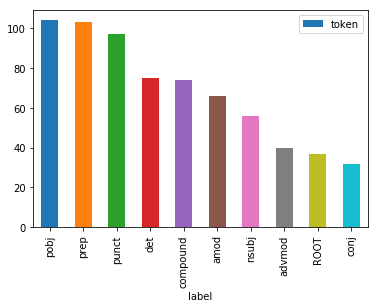

In [16]:
dep = dep_df.groupby('label')['token'].count().reset_index()

dep.nlargest(columns=['token'], n=10).plot(x='label' , y='token', kind='bar' )

In [17]:
spacy.displacy.render(doc, style='dep', jupyter=True,options={'distance': 80})
spacy.displacy.render(nlp('Kaggle is fun, keep kaggling'), style='dep', jupyter=True,options={'distance': 80})

### Similarity

In [18]:
%%time
# `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors
# df['Similarity'] = df['StatsDoc'].apply(lambda x: x.similarity(doc)) 

nlp = spacy.load('en_core_web_lg')
df['LargeStatsDoc'] = df['body'].apply(nlp)

CPU times: user 12.5 s, sys: 3.61 s, total: 16.1 s
Wall time: 17.2 s


In [19]:
doc = df['LargeStatsDoc'][row_index]
doc

Two sets of findings, related to societal trust levels, in a report released last week at the World Economic Forums annual meeting in Davos, should be a cause of grave concern to all of us. Part of a study released by communications group Edelman, the survey of more than 33,000 people in 28 countries including India, recorded the largest-ever drop of trust in business, government, the media, and non-government organisations (NGOs).   Corporate chief executive officers (CEOs), whose credibility level dropped in each of the countries surveyed, were aggressively targeted with only 37% of people saying they trusted them.The 12-point drop from the previous year is the all-time low since the survey began in 2001. This isnt the first time the corporate sector has been reminded of declining peoples trust. Last January, Young & Rubicam BrandAsset Valuator revealed that consumers trust in well-known brands continues to fall.ALSO READ | What global CEOs are watching for, according to a PwC su

### Matcher

#### RuleMatcher

In [20]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

```ScratchPad```

In [21]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
name = 'Nevil'
name = 'James'
test_docs = [
    f'Hey this is {name}',
    f'Hi I am {name} from Mumbai',
    f'Hi this is {name} joining from Mumbai'
]

single_doc = ''
for each in test_docs:
    single_doc = single_doc + '; ' + each

processed_test_docs = [nlp(each) for each in test_docs]

doc = processed_test_docs[0]
doc = nlp(single_doc)

ent_df = pd.DataFrame()

for i, token in enumerate(doc.ents):
    ent_df.loc[i, 'entity'] = token.text
    ent_df.loc[i, 'label'] = token.label_
    ent_df.loc[i, 'recognition'] = spacy.explain(token.label_)
ent_df.head(20)

,entity,label,recognition
0,James,PERSON,"People, including fictional"
1,James,PERSON,"People, including fictional"
2,Mumbai,GPE,"Countries, cities, states"
3,James,PERSON,"People, including fictional"
4,Mumbai,GPE,"Countries, cities, states"


In [22]:

pos_df = pd.DataFrame()

for i, token in enumerate(doc):
    pos_df.loc[i, 'text'] = token.text
    pos_df.loc[i, 'lemma'] = token.lemma_,
    pos_df.loc[i, 'pos'] = spacy.explain(token.pos_)
    pos_df.loc[i, 'pos_id'] = token.pos_
    pos_df.loc[i, 'tag'] = token.tag_
    pos_df.loc[i, 'dep'] = token.dep_
    pos_df.loc[i, 'shape'] = token.shape_
    pos_df.loc[i, 'is_alpha'] = token.is_alpha
    pos_df.loc[i, 'is_stop'] = token.is_stop
    pos_df.loc[i, 'is_punctuation'] = token.is_punct
    
pos_df

,text,lemma,pos,pos_id,tag,dep,shape,is_alpha,is_stop,is_punctuation
0,;,;,punctuation,PUNCT,:,ROOT,;,False,False,True
1,Hey,"(hey,)",interjection,INTJ,UH,intj,Xxx,True,False,False
2,this,"(this,)",determiner,DET,DT,nsubj,xxxx,True,True,False
3,is,"(be,)",verb,VERB,VBZ,pobj,xx,True,True,False
4,James,"(James,)",proper noun,PROPN,NNP,attr,Xxxxx,True,False,False
5,;,"(;,)",punctuation,PUNCT,:,punct,;,False,False,True
6,Hi,"(hi,)",interjection,INTJ,UH,intj,Xx,True,False,False
7,I,"(-PRON-,)",pronoun,PRON,PRP,nsubj,X,True,True,False
8,am,"(be,)",verb,VERB,VBP,pobj,xx,True,True,False
9,James,"(James,)",proper noun,PROPN,NNP,attr,Xxxxx,True,False,False


#### Example

- [Parts of Speech Annotations](https://spacy.io/api/annotation)
- [Operators](https://spacy.io/usage/rule-based-matching#quantifiers)


In [23]:

pattern1 = [
    {"POS": "INTJ", "OP": "+"},
    {"POS": "DET", "OP": "?"},
    {"POS": "PRON", "OP": "?"},
    {"POS": "VERB", "OP": "+"},
    {"POS": "PROPN", "OP": "+"},
]


matcher = Matcher(nlp.vocab)
matcher.add("MeetingGreeting", None, pattern1)

list_of_matches = [matcher(each) for each in processed_test_docs]
sentence_no_of_matched = []
for sentence_no, matches in enumerate(list_of_matches):
    for id, start, end in matches:
        print(f'Pattern={id} matched_at={processed_test_docs[sentence_no][start:end]}')
        sentence_no_of_matched.append(sentence_no)

for sentence_no in sentence_no_of_matched:
    doc = processed_test_docs[sentence_no]
    persons = [token for token in doc.ents if token.label_ == 'PERSON']
#     persons = [(token.text, token.label_) for token in doc.ents]
    print(f'DOC={doc} with NER={persons}')

Pattern=15835131069142818128 matched_at=Hey this is James
Pattern=15835131069142818128 matched_at=Hi I am James
Pattern=15835131069142818128 matched_at=Hi this is James
DOC=Hey this is James with NER=[James]
DOC=Hi I am James from Mumbai with NER=[James]
DOC=Hi this is James joining from Mumbai with NER=[James]


#### PhraseMatcher